In [5]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [32]:
#getting the data
df=pd.read_csv("/content/weatherHistory.csv.zip")

In [33]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [35]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [36]:
df.isnull()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,False,False,False,False,False,False,False,False,False,False,False,False
96449,False,False,False,False,False,False,False,False,False,False,False,False
96450,False,False,False,False,False,False,False,False,False,False,False,False
96451,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


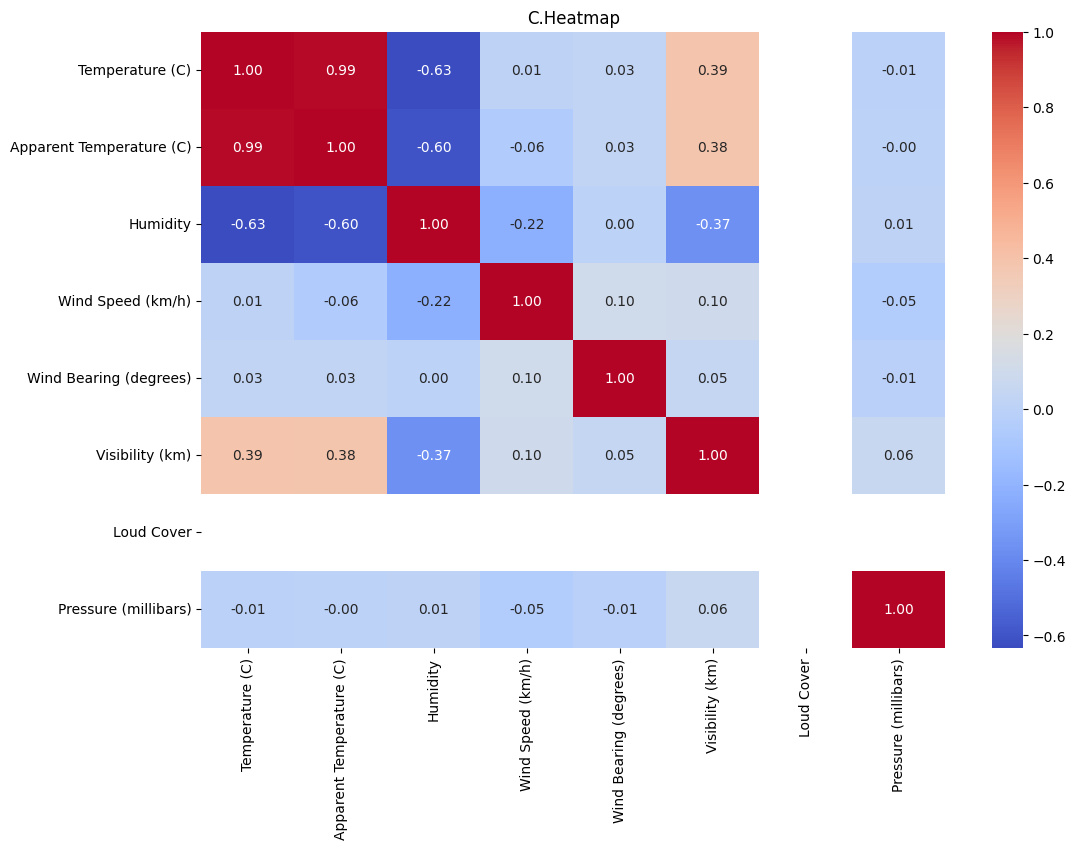

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("C.Heatmap")
plt.show()

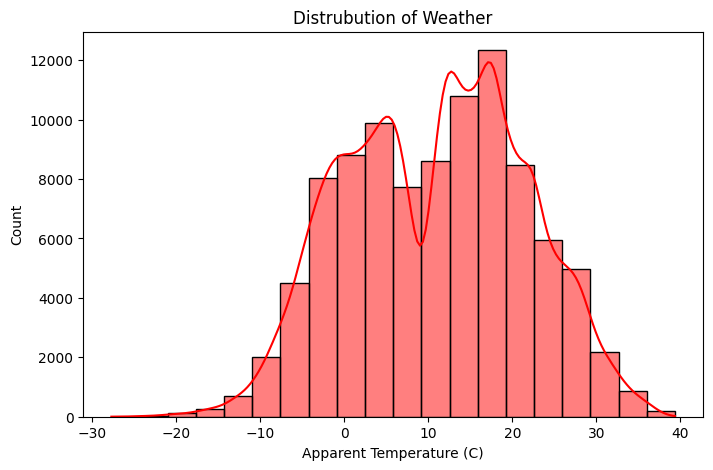

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df['Apparent Temperature (C)'],bins=20,kde=True,color="red") #plt.hist()
plt.title("Distrubution of Weather")
plt.show()

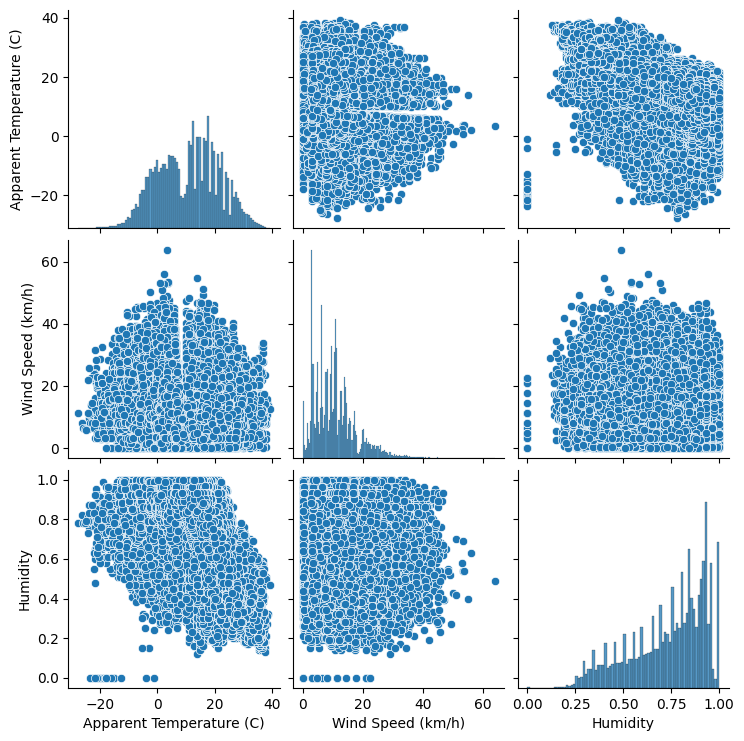

In [46]:
numeric_feature=['Apparent Temperature (C)','Wind Speed (km/h)','Humidity']
sns.pairplot(df[numeric_feature])
plt.show()

In [51]:
# Feature selection
features = ['Temperature (C)', 'Wind Speed (km/h)', 'Humidity']
X = df[features]
y = df['Apparent Temperature (C)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model building
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [52]:
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: -2.31749095220108
Coefficients: [ 1.12562834 -0.09489324  1.04669235]


In [53]:
y_pred=model.predict(X_test)

In [54]:
y_pred

array([28.62589578,  8.4325441 , 13.52384933, ...,  9.38357104,
       24.8165529 , 17.98607202])

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print("MAE :", MAE)
print("MSE :", MSE)
print("RMSE :", RMSE)
print("R² Score :", R2)


MAE : 0.8521654704762263
MSE : 1.1655006733758875
RMSE : 1.0795835647951888
R² Score : 0.9899264223874612


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


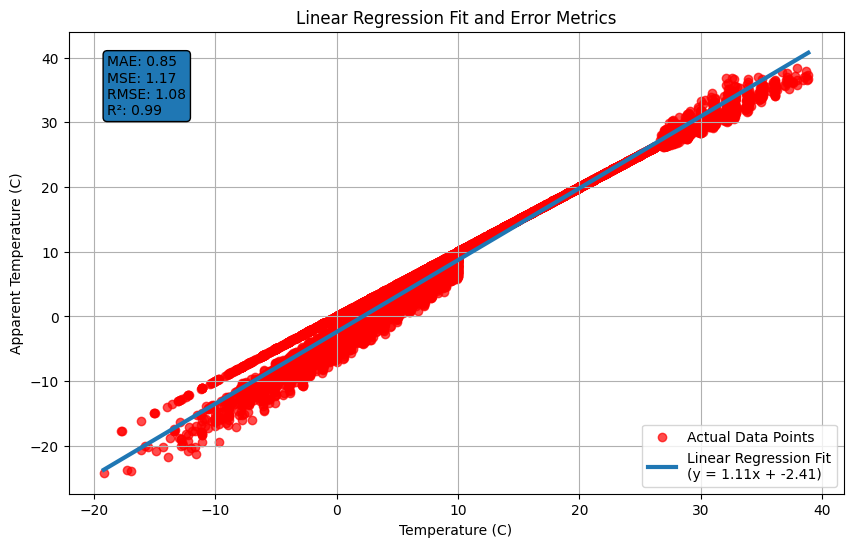

In [66]:
plt.figure(figsize=(10, 6))

# Scatter plot (actual points)
plt.scatter(X_test, y_test, label="Actual Data Points",color='red', alpha=0.7)

# Regression line
X_line = np.sort(X_test.values, axis=0)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, linewidth=3, label=f"Linear Regression Fit\n(y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})")

# Metric box
textstr = f"MAE: {MAE:.2f}\nMSE: {MSE:.2f}\nRMSE: {RMSE:.2f}\nR²: {R2:.2f}"
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round'))

# Labels & title
plt.xlabel("Temperature (C)")
plt.ylabel("Apparent Temperature (C)")
plt.title("Linear Regression Fit and Error Metrics")
plt.legend()
plt.grid(True)

plt.show()


In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [73]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [74]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [75]:
print("Dataset loaded successfully!")
print("Train shape:", x_train.shape)
print("Test shape: ", x_test.shape)

Dataset loaded successfully!
Train shape: (50000, 32, 32, 3)
Test shape:  (10000, 32, 32, 3)


In [79]:
model = Sequential([
    Dense(32, activation='relu', input_dim=x_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),   # ✅ matches image shape

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)   # ✅ regression-style output
])


In [85]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [86]:
history_5 = model.fit(
    x_train, y_train.astype("float32"),
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 49ms/step - loss: 8.4129 - mae: 2.4363 - val_loss: 6.5871 - val_mae: 2.1326
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - loss: 6.5021 - mae: 2.1047 - val_loss: 5.9562 - val_mae: 2.0133
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - loss: 5.8873 - mae: 1.9719 - val_loss: 5.5905 - val_mae: 1.9075
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - loss: 5.4560 - mae: 1.8768 - val_loss: 5.3516 - val_mae: 1.8320
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - loss: 5.1526 - mae: 1.7999 - val_loss: 5.5011 - val_mae: 1.8495


In [95]:
history_7 = model.fit(
    x_train, y_train.astype("float32"),
    epochs=7,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - loss: 3.1461 - mae: 1.3786 - val_loss: 4.6822 - val_mae: 1.6496
Epoch 2/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - loss: 3.0141 - mae: 1.3528 - val_loss: 4.5688 - val_mae: 1.6217
Epoch 3/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - loss: 2.8490 - mae: 1.3122 - val_loss: 4.6011 - val_mae: 1.6344
Epoch 4/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 43ms/step - loss: 2.6915 - mae: 1.2768 - val_loss: 4.4892 - val_mae: 1.6095
Epoch 5/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - loss: 2.5545 - mae: 1.2440 - val_loss: 4.7457 - val_mae: 1.6521
Epoch 6/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - loss: 2.3875 - mae: 1.2007 - val_loss: 4.5250 - val_mae: 1.6087
Epoch 7/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - loss: 2.2403 - mae: 1.1595 - val_loss: 4.6990 - val_mae: 1.6567


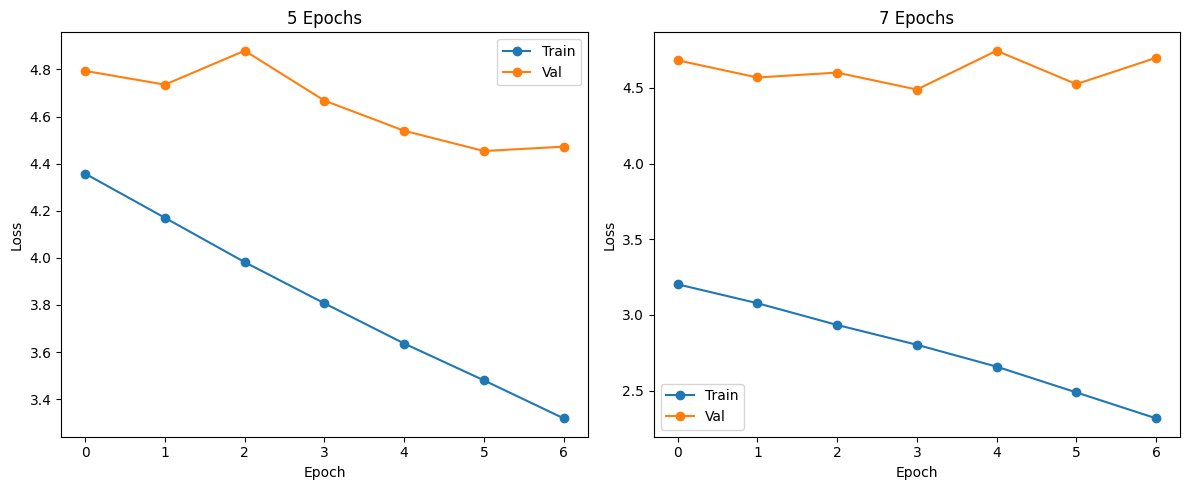

In [96]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_5.history['loss'], marker='o')
plt.plot(history_5.history['val_loss'], marker='o')
plt.title("5 Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history_7.history['loss'], marker='o')
plt.plot(history_7.history['val_loss'], marker='o')
plt.title("7 Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])

plt.tight_layout()
plt.show()
